# EXPLORATORY DATA ANALYSIS AND DATA CLEANING


The provided data has the financial transaction data as well as the target variable isFraud, which is the actual fraud status
of the transaction and isFlaggedFraud is the indicator which the simulation is used to flag the transaction using some
threshold. The goal should be how we can improve and come up with better threshold to capture the fraud transaction.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib as plt
import matplotlib.cm as cm
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
D:\ProgramFiles\anaconda3\envs\tf-gpu\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# loading dataset
try:
     FraudTransactions=pd.read_csv('C:/Users/soumy/Python_Workspace/GLOBESYN_CODES/FraudDetection/Fraud.csv')
except:
      print('Database not able to load')
df=FraudTransactions


Test if there any missing values in DataFrame. It turns out there are no obvious missing values but, as we will see below,
this does not rule out proxies by a numerical value like 0.

In [3]:
print(df.isnull().values.any())

False


Quickly look at the dataset sample and other properties.

In [4]:
print(df.head())
print(df.describe())
print(df.info())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  
               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6

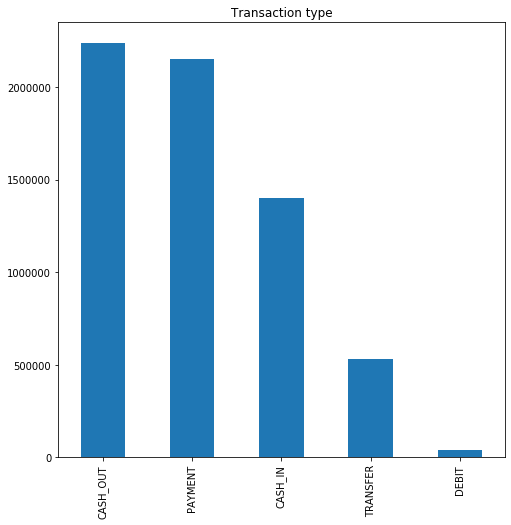

In [5]:
f, ax = plt.pyplot.subplots(1, 1, figsize=(8, 8))
df.type.value_counts().plot(kind='bar', title="Transaction type", ax=ax, figsize=(8,8))
plt.pyplot.show()


 The types of fraudulent transactions are ['TRANSFER', 'CASH_OUT']

 The number of fraudulent TRANSFERs = 4097

 The number of fraudulent CASH_OUTs = 4116


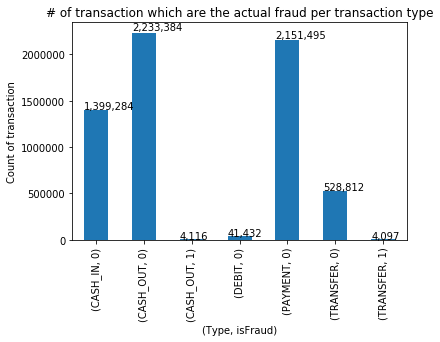

In [6]:
print('\n The types of fraudulent transactions are {}'.format(list(df.loc[df.isFraud == 1].type.drop_duplicates().values))) 
# only 'CASH_OUT' & 'TRANSFER'
dfFraudTransfer = df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')]
dfFraudCashout = df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')]
print ('\n The number of fraudulent TRANSFERs = {}'.format(len(dfFraudTransfer))) # 4097
print ('\n The number of fraudulent CASH_OUTs = {}'.format(len(dfFraudCashout))) # 4116
ax = df.groupby(['type', 'isFraud']).size().plot(kind='bar')
ax.set_title("# of transaction which are the actual fraud per transaction type")
ax.set_xlabel("(Type, isFraud)")
ax.set_ylabel("Count of transaction")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

We find that of the five types of transactions, fraud occurs only in two of them 'TRANSFER' where money is sent to a
customer / fraudster and 'CASH_OUT' where money is sent to a merchant who pays the customer / fraudster in cash.
Remarkably, the number of fraudulent TRANSFERs almost equals the number of fraudulent CASH_OUTs. This gives us
an insight into the modus operandi of fraudulent transactions in this dataset, namely, fraud is committed by first
transferring out funds to another account which subsequently cashes it out.
There are 2 flags which stand out to me and it's interesting to look onto: isFraud and isFlaggedFraud column. From the
hypothesis, isFraud is the indicator which indicates the actual fraud transactions whereas isFlaggedFraud is what the
system prevents the transaction due to some thresholds being triggered. Let's quickly what kinds of transaction are being
flagged and are fraud.

It turns out that the origin of isFlaggedFraud is unclear, contrasting with the description provided. The 16 entries (out of 6
million) where the isFlaggedFraud feature is set do not seem to correlate with any explanatory variable. The data is
described as isFlaggedFraud being set when an attempt is made to 'TRANSFER' an 'amount' greater than 200,000. In
fact, as shown below, isFlaggedFraud can remain not set despite this condition being met.


The type of transactions in which isFlaggedFraud is set: ['TRANSFER']

Min amount transacted when isFlaggedFraud is set= 353874.22

Max amount transacted in a TRANSFER where isFlaggedFraud is not set=92445516.64


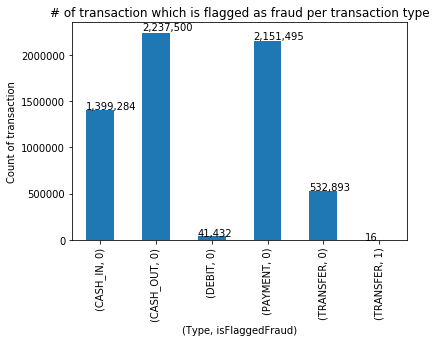

In [7]:
ax = df.groupby(['type', 'isFlaggedFraud']).size().plot(kind='bar')
ax.set_title("# of transaction which is flagged as fraud per transaction type")
ax.set_xlabel("(Type, isFlaggedFraud)")
ax.set_ylabel("Count of transaction")
for p in ax.patches:
      ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
print('\nThe type of transactions in which isFlaggedFraud is set: \
{}'.format(list(df.loc[df.isFlaggedFraud == 1].type.drop_duplicates())))
# only 'TRANSFER'
dfTransfer = df.loc[df.type == 'TRANSFER']
dfFlagged = df.loc[df.isFlaggedFraud == 1]
dfNotFlagged = df.loc[df.isFlaggedFraud == 0]
print('\nMin amount transacted when isFlaggedFraud is set= {}'\
.format(dfFlagged.amount.min())) # 353874.22
print('\nMax amount transacted in a TRANSFER where isFlaggedFraud is not set=\
{}'.format(dfTransfer.loc[dfTransfer.isFlaggedFraud == 0].amount.max()))

Let's look at those records of the transfers where isFlaggedFraud is set and compare with the records which the system
cannot catch'em. The plot below will also focus only on transfer transaction type.

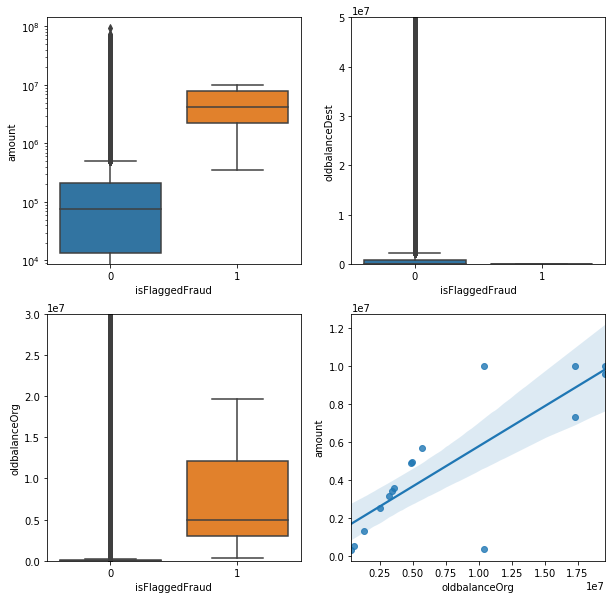

In [8]:
fig, axs = plt.pyplot.subplots(2, 2, figsize=(10, 10))
tmp = df.loc[(df.type == 'TRANSFER'), :]
a = sns.boxplot(x = 'isFlaggedFraud', y = 'amount', data = df, ax=axs[0][0])
axs[0][0].set_yscale('log')
b = sns.boxplot(x = 'isFlaggedFraud', y = 'oldbalanceDest', data = df, ax=axs[0]
[1])
axs[0][1].set(ylim=(0, 0.5e8))
c = sns.boxplot(x = 'isFlaggedFraud', y = 'oldbalanceOrg', data=df, ax=axs[1][0]
)
axs[1][0].set(ylim=(0, 3e7))
d = sns.regplot(x = 'oldbalanceOrg', y = 'amount', data=df.loc[(df.isFlaggedFraud ==1), :], ax=axs[1][1])
plt.pyplot.show()

By looking at the visualisations we think that isFlaggedFraud might depend on oldbalanceDest,which is 0 and some
threshold on the amount variable. Futher studies might confirm our assumption.


Can oldBalanceDest and newBalanceDest determine isFlaggedFraud being set? The old is identical to the new balance in
the origin and destination accounts, for every TRANSFER where isFlaggedFraud is set. This is presumably because the
transaction is halted. Interestingly, oldBalanceDest = 0 in every such transaction. However, as shown below,
sinceisFlaggedFraud can remain not set in TRANSFERS where oldBalanceDest and newBalanceDest can both be 0,
these conditions do not determine the state of isFlaggedFraud.

In [9]:
print('\nThe number of TRANSFERs where isFlaggedFraud = 0, yet oldBalanceDest =0 and\
 newBalanceDest = 0: {}'.\
format(len(dfTransfer.loc[(dfTransfer.isFlaggedFraud == 0) & \
(dfTransfer.oldbalanceDest == 0) & (dfTransfer.newbalanceDest == 0)]))) # 4158


The number of TRANSFERs where isFlaggedFraud = 0, yet oldBalanceDest =0 and newBalanceDest = 0: 4158


isFlaggedFraud being set cannot be thresholded on oldBalanceOrig since the corresponding range of values overlaps with
that for TRANSFERs where isFlaggedFraud is not set (see below). Note that we do not need to consider
newBalanceOrigsince it is updated only after the transaction, whereas isFlaggedFraud would be set before the transaction
takes place.

In [10]:
print('\nMin, Max of oldbalanceOrg for isFlaggedFraud = 1 TRANSFERs: {}'.\
format([round(dfFlagged.oldbalanceOrg.min()), round(dfFlagged.oldbalanceOrg.max(
))]))
print('\nMin, Max of oldBalanceOrig for isFlaggedFraud = 0 TRANSFERs where \
oldBalanceOrig = \
newBalanceOrig: {}'.format(\
[dfTransfer.loc[(dfTransfer.isFlaggedFraud == 0) & (dfTransfer.oldbalanceOrg \
== dfTransfer.newbalanceOrig)].oldbalanceOrg.min(), \
round(dfTransfer.loc[(dfTransfer.isFlaggedFraud == 0) & (dfTransfer.oldbalanceOrg \
== dfTransfer.newbalanceOrig)].oldbalanceOrg.max())]))


Min, Max of oldbalanceOrg for isFlaggedFraud = 1 TRANSFERs: [353874.0, 19585040.0]

Min, Max of oldBalanceOrig for isFlaggedFraud = 0 TRANSFERs where oldBalanceOrig = newBalanceOrig: [0.0, 575668.0]


Can isFlaggedFraud be set based on seeing a customer transacting more than once? Note that duplicate customer names
don't exist within transactions where isFlaggedFraud is set, but duplicate customer names exist within transactions where
isFlaggedFraud is not set. It turns out that originators of transactions that have isFlaggedFraud set have transacted only
once. Very few destination accounts of transactions that have isFlaggedFraud set have transacted more than once.

In [11]:
print('\nMin, Max of oldbalanceOrg for isFlaggedFraud = 1 TRANSFERs: {}'.\
format([round(dfFlagged.oldbalanceOrg.min()), round(dfFlagged.oldbalanceOrg.max(
))]))
print('\nMin, Max of oldBalanceOrig for isFlaggedFraud = 0 TRANSFERs where \
oldBalanceOrig = \
newBalanceOrig: {}'.format(\
[dfTransfer.loc[(dfTransfer.isFlaggedFraud == 0) & (dfTransfer.oldbalanceOrg \
== dfTransfer.newbalanceOrig)].oldbalanceOrg.min(), \
round(dfTransfer.loc[(dfTransfer.isFlaggedFraud == 0) & (dfTransfer.oldbalanceOrg\
== dfTransfer.newbalanceOrig)].oldbalanceOrg.max())]))


Min, Max of oldbalanceOrg for isFlaggedFraud = 1 TRANSFERs: [353874.0, 19585040.0]

Min, Max of oldBalanceOrig for isFlaggedFraud = 0 TRANSFERs where oldBalanceOrig = newBalanceOrig: [0.0, 575668.0]


It can be easily seen that transactions with isFlaggedFraud set occur at all values of step, similar to the complementary set
of transactions. Thus isFlaggedFraud does not correlate with step either and is therefore seemingly unrelated to any
explanatory variable or feature in the data
Conclusion: Although isFraud is always set when isFlaggedFraud is set, since isFlaggedFraud is set just 16 times in a
seemingly meaningless way, we can treat this feature as insignificant and discard it in the dataset without loosing
information.
Are expected merchant accounts accordingly labelled? It was stated that CASH_IN involves being paid by a merchant
(whose name is prefixed by 'M'). However, as shown below, the present data does not have merchants making CASH_IN
transactions to customers.

In [12]:
print('\nAre there any merchants among originator accounts for CASH_IN \
transactions? {}'.format(\
(df.loc[df.type == 'CASH_IN'].nameOrig.str.contains('M')).any()))


Are there any merchants among originator accounts for CASH_IN transactions? False


Similarly, it was stated that CASH_OUT involves paying a merchant. However, for CASH_OUT transactions there are no
merchants among the destination accounts.

In [13]:
print('\nAre there any merchants among destination accounts for CASH_OUT \
transactions? {}'.format(\
(df.loc[df.type == 'CASH_OUT'].nameDest.str.contains('M')).any())) 


Are there any merchants among destination accounts for CASH_OUT transactions? False


In fact, there are no merchants among any originator accounts. Merchants are only present in destination accounts for all
PAYMENTS

In [14]:
print('\nAre there merchants among any originator accounts? {}'.format(\
df.nameOrig.str.contains('M').any())) # False
print('\nAre there any transactions having merchants among destination accounts\
 other than the PAYMENT type? {}'.format(\
(df.loc[df.nameDest.str.contains('M')].type != 'PAYMENT').any()))


Are there merchants among any originator accounts? False

Are there any transactions having merchants among destination accounts other than the PAYMENT type? False


Conclusion: Among the account labels nameOrig and nameDest, for all transactions, the merchant prefix of 'M' occurs in
an unexpected way.
Are there account labels common to fraudulent TRANSFERs and CASH_OUTs? From the data description, the modus
operandi for committing fraud involves first making a TRANSFER to a (fraudulent) account which in turn conducts a
CASH_OUT. CASH_OUT involves transacting with a merchant who pays out cash. Thus, within this two-step process, the
fraudulent account would be both, the destination in a TRANSFER and the originator in a CASH_OUT. However, the data
shows below that there are no such common accounts among fraudulent transactions. Thus, the data is not imprinted with
the expected modus-operandi.

In [15]:
print('\nWithin fraudulent transactions, are there destinations for TRANSFERS \
that are also originators for CASH_OUTs? {}'.format(\
(dfFraudTransfer.nameDest.isin(dfFraudCashout.nameOrig)).any())) # False
dfNotFraud = df.loc[df.isFraud == 0]


Within fraudulent transactions, are there destinations for TRANSFERS that are also originators for CASH_OUTs? False


Could destination accounts for fraudulent TRANSFERs originate CASHOUTs that are not detected and are labeled as
genuine? It turns out there are 3 such accounts.

In [16]:
print('\nFraudulent TRANSFERs whose destination accounts are originators of \
genuine CASH_OUTs: \n\n{}'.format(dfFraudTransfer.loc[dfFraudTransfer.nameDest.\
isin(dfNotFraud.loc[dfNotFraud.type == 'CASH_OUT'].nameOrig.drop_duplicates())])
)


Fraudulent TRANSFERs whose destination accounts are originators of genuine CASH_OUTs: 

         step      type      amount     nameOrig  oldbalanceOrg  \
1030443    65  TRANSFER  1282971.57  C1175896731     1282971.57   
6039814   486  TRANSFER   214793.32  C2140495649      214793.32   
6362556   738  TRANSFER   814689.88  C2029041842      814689.88   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
1030443             0.0  C1714931087             0.0             0.0        1   
6039814             0.0   C423543548             0.0             0.0        1   
6362556             0.0  C1023330867             0.0             0.0        1   

         isFlaggedFraud  
1030443               0  
6039814               0  
6362556               0  


However, 2 out of 3 of these accounts first make a genuine CASH_OUT and only later (as evidenced by the time step)
receive a fraudulent TRANSFER. Thus, fraudulent transactions are not indicated by the nameOrig and nameDest
features.

In [17]:
print('\nFraudulent TRANSFER to C423543548 occured at step = 486 whereas \
genuine CASH_OUT from this account occured earlier at step = {}'.format(\
dfNotFraud.loc[(dfNotFraud.type == 'CASH_OUT') & (dfNotFraud.nameOrig == \
'C423543548')].step.values))


Fraudulent TRANSFER to C423543548 occured at step = 486 whereas genuine CASH_OUT from this account occured earlier at step = [185]


Conclusion: Noting from section 2.3 above that the nameOrig and nameDest features neither encode merchant accounts
in the expected way, below, we drop these features from the data since they are meaningless.

# DATA CLEANING

From the exploratory data analysis (EDA), we know that fraud only occurs in

In [18]:
df = df.loc[(df['type'].isin(['CASH_OUT', 'TRANSFER'])),:]
df.drop(df.columns[[0,3,6,10]], axis=1, inplace=True)


D:\ProgramFiles\anaconda3\envs\tf-gpu\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [19]:
df.type=pd.factorize(df.type)[0]

D:\ProgramFiles\anaconda3\envs\tf-gpu\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [20]:
df

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,0,181.00,181.00,0.0,0.00,0.00,1
3,1,181.00,181.00,0.0,21182.00,0.00,1
15,1,229133.94,15325.00,0.0,5083.00,51513.44,0
19,0,215310.30,705.00,0.0,22425.00,0.00,0
24,0,311685.89,10835.00,0.0,6267.00,2719172.89,0
...,...,...,...,...,...,...,...
6362615,1,339682.13,339682.13,0.0,0.00,339682.13,1
6362616,0,6311409.28,6311409.28,0.0,0.00,0.00,1
6362617,1,6311409.28,6311409.28,0.0,68488.84,6379898.11,1
6362618,0,850002.52,850002.52,0.0,0.00,0.00,1
